Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)
from datetime import datetime
from dateutil.parser import parse
from pandas.tseries.offsets import *
import pytz
import re
import statsmodels.api as sm

Parsing data 

In [267]:
leagues = ['en', 'es', 'it', 'gr', 'fr']
years = ['1819', '1718', '1617', '1516', '1415']
data = {}
for i in leagues:
    for j in years:
        data[i+j] = pd.read_csv(i+j+'.csv')

In [227]:
print(data['en1415'].columns)

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD',
       'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA',
       'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'Bb1X2',
       'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD', 'BbMxA', 'BbAvA', 'BbOU',
       'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5', 'BbAH', 'BbAHh',
       'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA', 'PSCH', 'PSCD', 'PSCA'],
      dtype='object')


en1819 : 380
en1718 : 380
en1617 : 380
en1516 : 380
en1415 : 380
es1819 : 380
es1718 : 380
es1617 : 380
es1516 : 380
es1415 : 380
it1819 : 380
it1718 : 380
it1617 : 380
it1516 : 380
it1415 : 380
gr1819 : 306
gr1718 : 306
gr1617 : 306
gr1516 : 306
gr1415 : 306
fr1819 : 380
fr1718 : 380
fr1617 : 380
fr1516 : 380
fr1415 : 380


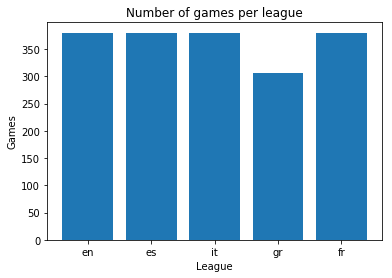

In [3]:
# number of games per season -> to check if the data includes every game
for i, j in data.items():
    print(i, ':', len(j))
    
d = {}
d['en'] = 380
d['es'] = 380
d['it'] = 380
d['gr'] = 306
d['fr'] = 380
plt.bar(d.keys(), d.values())
plt.title('Number of games per league')
plt.xlabel('League')
plt.ylabel('Games');
print(len)

en1819 : 0
en1718 : 0
en1617 : 0
en1516 : 1
en1415 : 340
es1819 : 0
es1718 : 2
es1617 : 4
es1516 : 1
es1415 : 351
it1819 : 0
it1718 : 1
it1617 : 5
it1516 : 1
it1415 : 361
gr1819 : 1
gr1718 : 1
gr1617 : 1
gr1516 : 0
gr1415 : 280
fr1819 : 2
fr1718 : 4
fr1617 : 4
fr1516 : 2
fr1415 : 331


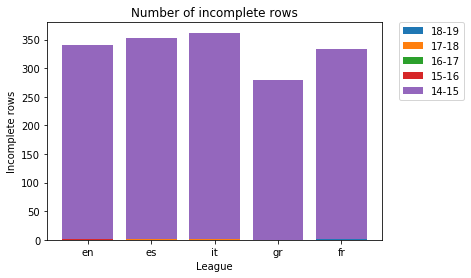

In [242]:
# number of missing values
result = {}
for i, j in data.items():
    missing = len(j) - len(j.dropna())
    print(i, ':', missing)
    result[i] = missing
    
season1819 = [result['en1819'], result['es1819'], result['it1819'], result['gr1819'], result['fr1819']]
season1718 = [result['en1718'], result['es1718'], result['it1718'], result['gr1718'], result['fr1718']]
season1617 = [result['en1617'], result['es1617'], result['it1617'], result['gr1617'], result['fr1617']]
season1516 = [result['en1516'], result['es1516'], result['it1516'], result['gr1516'], result['fr1516']]
season1415 = [result['en1415'], result['es1415'], result['it1415'], result['gr1415'], result['fr1415']]
    
p1 = plt.bar(leagues, season1819)
p2 = plt.bar(leagues, season1718, bottom=season1819)
p3 = plt.bar(leagues, season1617, bottom=season1718)
p4 = plt.bar(leagues, season1516, bottom=season1617)
p5 = plt.bar(leagues, season1415, bottom=season1516)
plt.legend(['18-19', '17-18', '16-17', '15-16', '14-15'], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Number of incomplete rows')
plt.xlabel('League')
plt.ylabel('Incomplete rows');


en1819 : 0
en1718 : 0
en1617 : 0
en1516 : 1
en1415 : 340
es1819 : 0
es1718 : 2
es1617 : 4
es1516 : 1
es1415 : 351
it1819 : 0
it1718 : 1
it1617 : 5
it1516 : 1
it1415 : 361
gr1819 : 1
gr1718 : 1
gr1617 : 1
gr1516 : 0
gr1415 : 280
fr1819 : 2
fr1718 : 4
fr1617 : 4
fr1516 : 2
fr1415 : 331


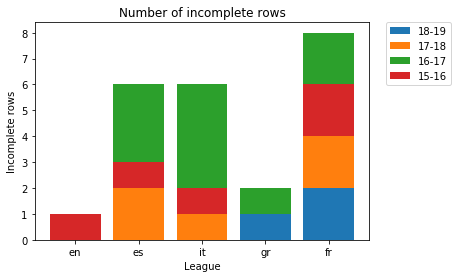

In [303]:
# number of missing values
result = {}
for i, j in data.items():
    missing = len(j) - len(j.dropna())
    print(i, ':', missing)
    result[i] = missing
    
season1819 = [result['en1819'], result['es1819'], result['it1819'], result['gr1819'], result['fr1819']]
season1718 = [result['en1718'], result['es1718'], result['it1718'], result['gr1718'], result['fr1718']]
season1617 = [result['en1617'], result['es1617'], result['it1617'], result['gr1617'], result['fr1617']]
season1516 = [result['en1516'], result['es1516'], result['it1516'], result['gr1516'], result['fr1516']]
# season1415 = [result['en1415'], result['es1415'], result['it1415'], result['gr1415'], result['fr1415']]
    
p1 = plt.bar(leagues, season1819)
p2 = plt.bar(leagues, season1718, bottom=season1819)
p3 = plt.bar(leagues, season1617, bottom=season1718)
p4 = plt.bar(leagues, season1516, bottom=season1718)
# p5 = plt.bar(leagues, season1415, bottom=season1516)
plt.legend(['18-19', '17-18', '16-17', '15-16', '14-15'], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Number of incomplete rows')
plt.xlabel('League')
plt.ylabel('Incomplete rows');


In [5]:
# columns that have missing entries -> to make sure the relevant one are present
for i, j in data.items():
    cols = j.columns[j.isnull().any()]
    print(i, ':', cols)
    
# mostly betting odds, but some important missing values in fr1617 (HS, AS, HF, AF, etc), but just a few (<4)

en1819 : Index([], dtype='object')
en1718 : Index([], dtype='object')
en1617 : Index([], dtype='object')
en1516 : Index(['BWH', 'BWD', 'BWA'], dtype='object')
en1415 : Index(['IWH', 'IWD', 'IWA', 'SJH', 'SJD', 'SJA'], dtype='object')
es1819 : Index([], dtype='object')
es1718 : Index(['LBH', 'LBD', 'LBA', 'PSCH', 'PSCD', 'PSCA'], dtype='object')
es1617 : Index(['IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA'], dtype='object')
es1516 : Index(['PSH', 'PSD', 'PSA'], dtype='object')
es1415 : Index(['IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'SJH',
       'SJD', 'SJA'],
      dtype='object')
it1819 : Index([], dtype='object')
it1718 : Index(['PSH', 'PSD', 'PSA'], dtype='object')
it1617 : Index(['HTHG', 'HTAG', 'HTR', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA'], dtype='object')
it1516 : Index(['VCH', 'VCD', 'VCA'], dtype='object')
it1415 : Index(['HY', 'IWH', 'IWD', 'IWA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA'], dtype='object')
gr1819 : Index(['PSH', 'PSD', 'PSA', 'PSCH', 'PSCD'

In [233]:
for i, j in data.items():
    if i not in ['en1415', 'es1415', 'it1415', 'gr1415', 'fr1415']:
        cols = j.columns[j.isnull().any()]
        print(i, ':', cols)

en1819 : Index([], dtype='object')
en1718 : Index([], dtype='object')
en1617 : Index([], dtype='object')
en1516 : Index(['BWH', 'BWD', 'BWA'], dtype='object')
es1819 : Index([], dtype='object')
es1718 : Index(['LBH', 'LBD', 'LBA', 'PSCH', 'PSCD', 'PSCA'], dtype='object')
es1617 : Index(['IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA'], dtype='object')
es1516 : Index(['PSH', 'PSD', 'PSA'], dtype='object')
it1819 : Index([], dtype='object')
it1718 : Index(['PSH', 'PSD', 'PSA'], dtype='object')
it1617 : Index(['HTHG', 'HTAG', 'HTR', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA'], dtype='object')
it1516 : Index(['VCH', 'VCD', 'VCA'], dtype='object')
gr1819 : Index(['PSH', 'PSD', 'PSA', 'PSCH', 'PSCD', 'PSCA'], dtype='object')
gr1718 : Index(['LBH', 'LBD', 'LBA'], dtype='object')
gr1617 : Index(['WHH', 'WHD', 'WHA'], dtype='object')
gr1516 : Index([], dtype='object')
fr1819 : Index(['PSH', 'PSD', 'PSA', 'VCH', 'VCD', 'VCA'], dtype='object')
fr1718 : Index(['IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA'], dty

In [234]:
for i, j in data.items():
    if i in ['en1415', 'es1415', 'it1415', 'gr1415', 'fr1415']:
        cols = j.columns[j.isnull().any()]
        print(i, ':', cols)

en1415 : Index(['IWH', 'IWD', 'IWA', 'SJH', 'SJD', 'SJA'], dtype='object')
es1415 : Index(['IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'SJH',
       'SJD', 'SJA'],
      dtype='object')
it1415 : Index(['HY', 'IWH', 'IWD', 'IWA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA'], dtype='object')
gr1415 : Index(['IWH', 'IWD', 'IWA', 'SJH', 'SJD', 'SJA'], dtype='object')
fr1415 : Index(['IWH', 'IWD', 'IWA', 'SJH', 'SJD', 'SJA'], dtype='object')


In [240]:
print(data['fr1617'][['HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR']].isnull().sum())
print(data['fr1617'][['HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR']].isnull())

HTHG    1
HTAG    1
HTR     1
HS      1
AS      1
HST     1
AST     1
HF      1
AF      1
HC      1
AC      1
HY      1
AY      1
HR      1
AR      1
dtype: int64
      HTHG   HTAG    HTR     HS     AS    HST    AST     HF     AF     HC  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
5    False  False  False  False  False  False  False  False  False  False   
6    False  False  False  False  False  False  False  False  False  False   
7    False  False  False  False  False  False  False  False  False  False   
8    False  False  False  False  False  False  False  False  False  False   
9    False  False  False  False  False  False  False  False  False 

/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memo

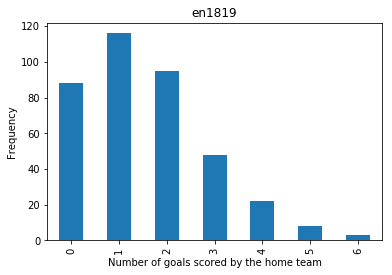

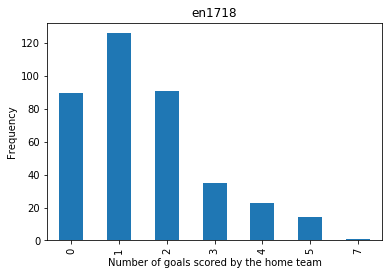

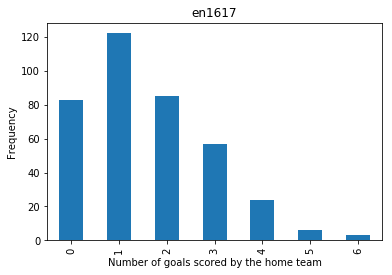

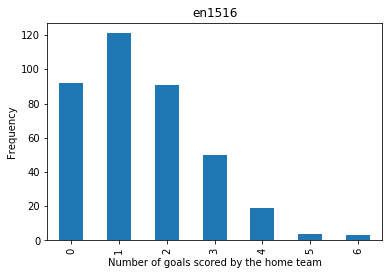

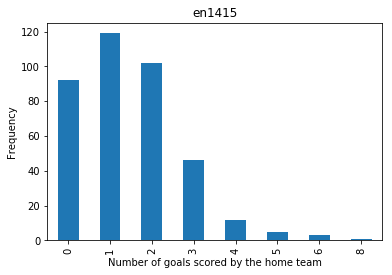

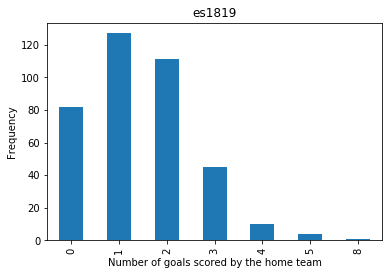

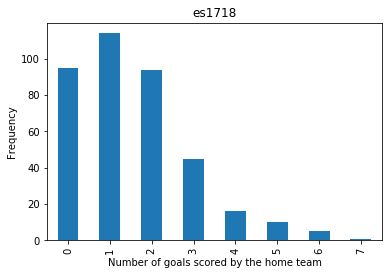

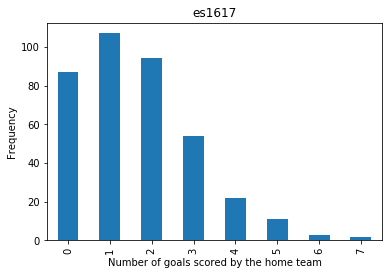

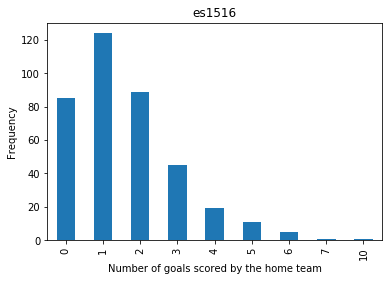

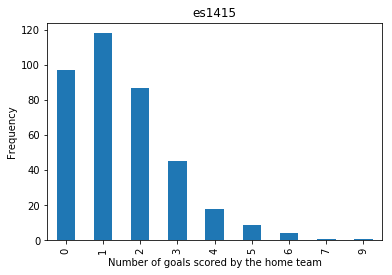

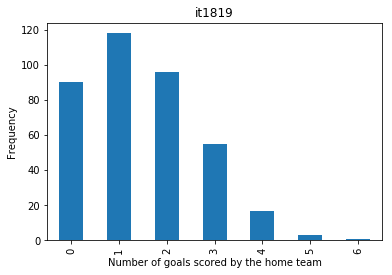

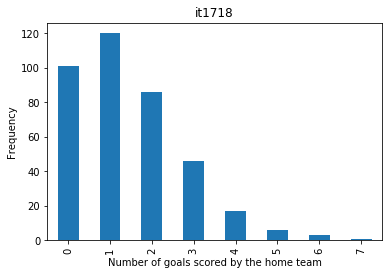

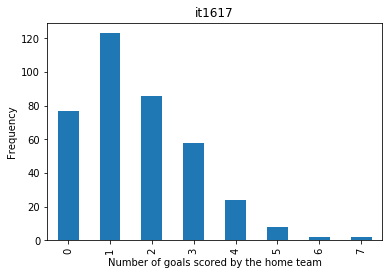

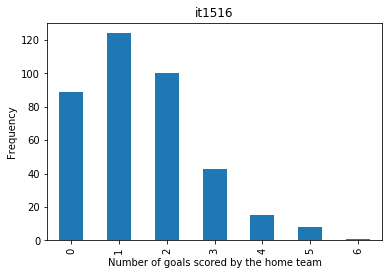

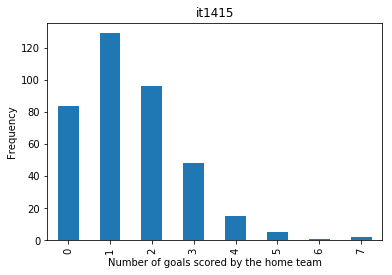

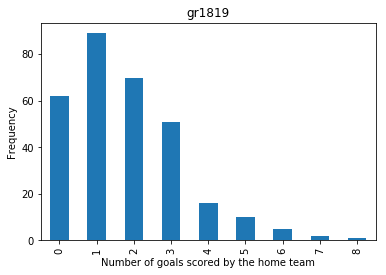

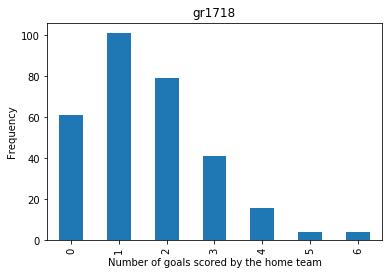

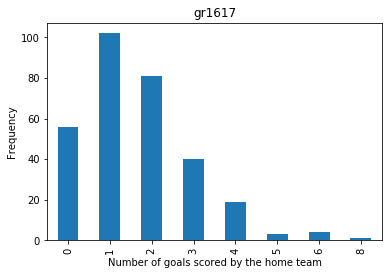

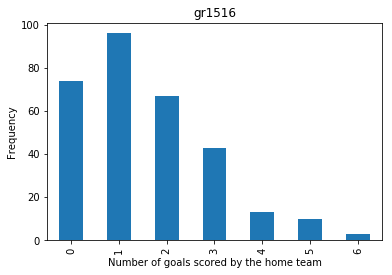

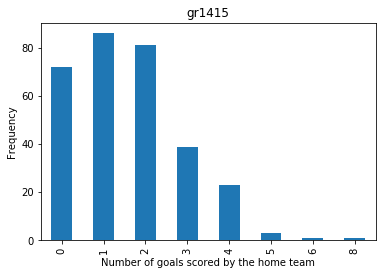

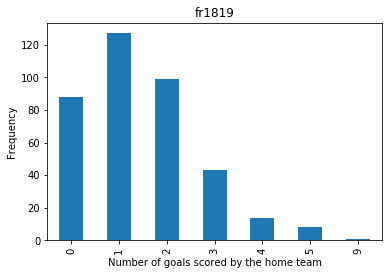

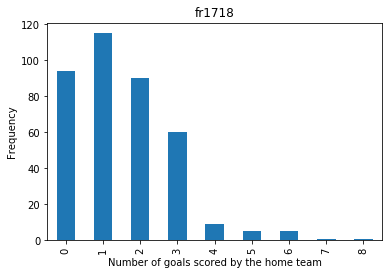

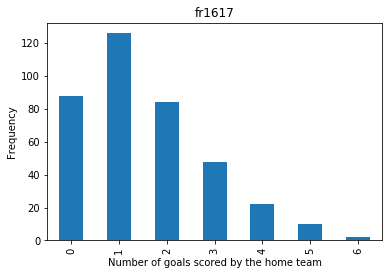

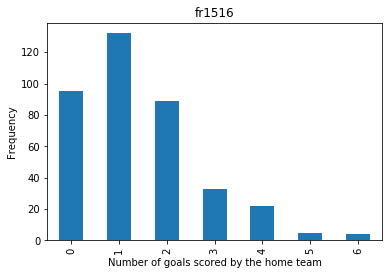

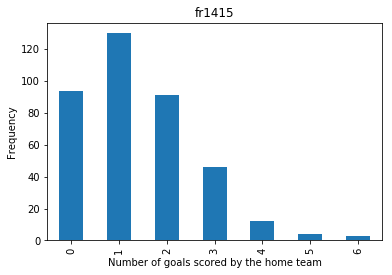

In [75]:
# home team goals
for i, j in data.items():
    fig, ax = plt.subplots()
    j['FTHG'].value_counts().sort_index().plot(ax=ax, kind='bar', title=i)
    plt.xlabel('Number of goals scored by the home team')
    plt.ylabel('Frequency');
    
#es1516 - Real Madrid beat Rayo with 10-2

/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memo

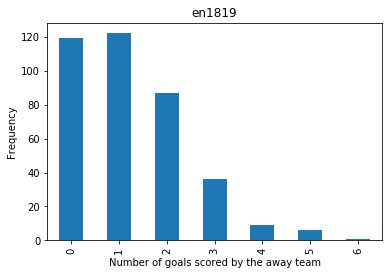

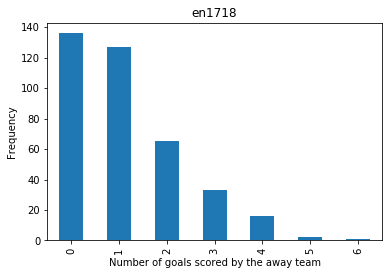

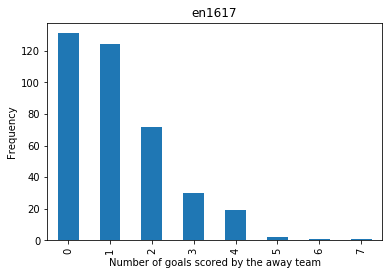

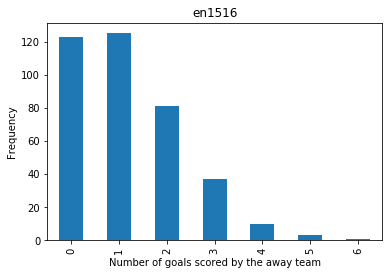

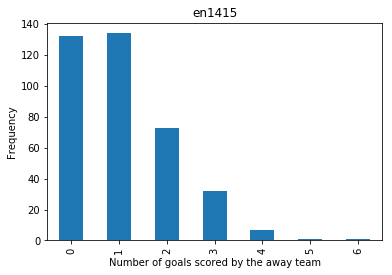

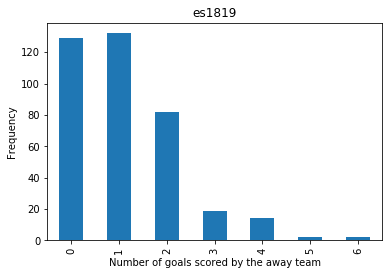

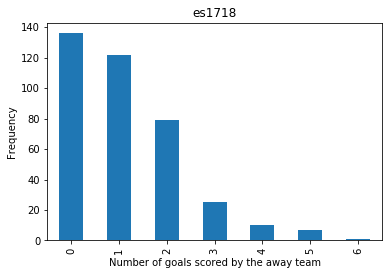

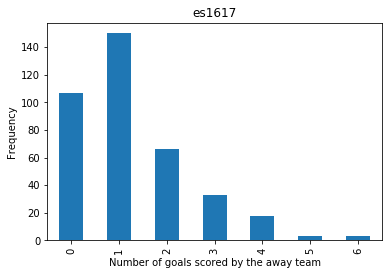

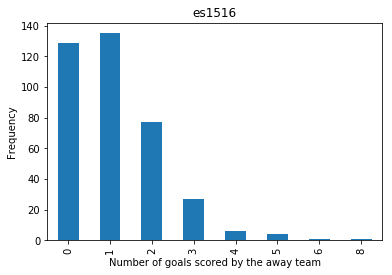

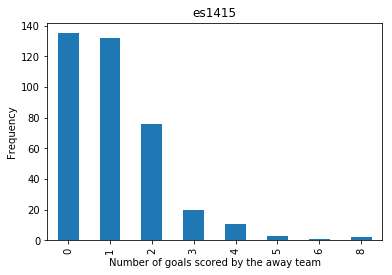

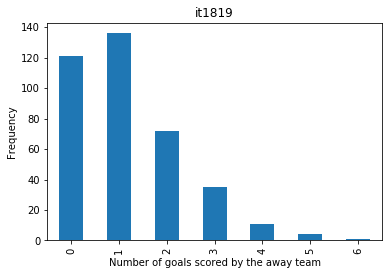

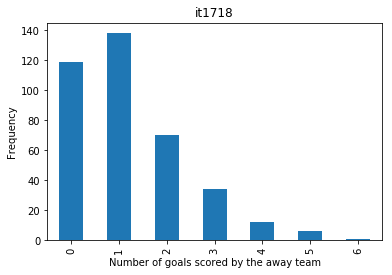

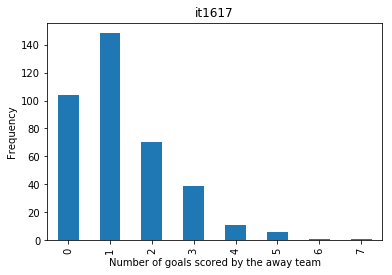

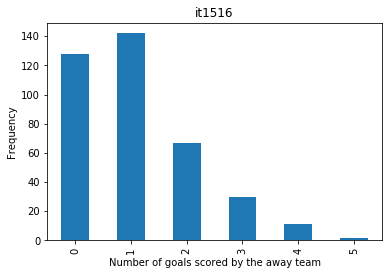

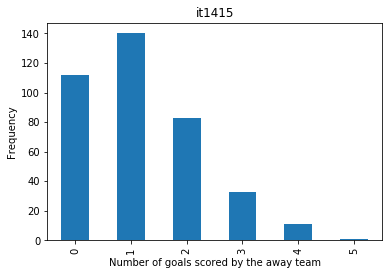

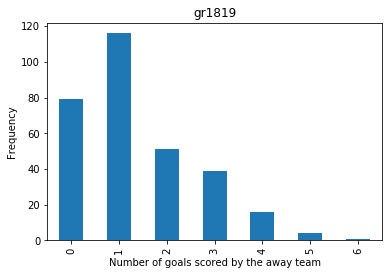

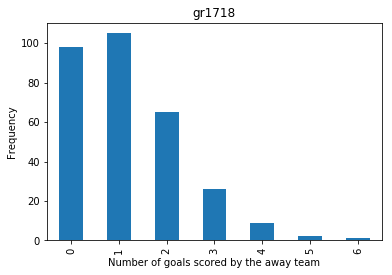

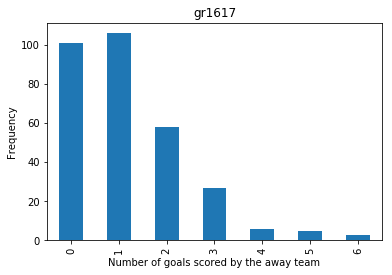

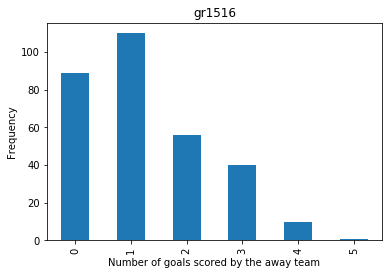

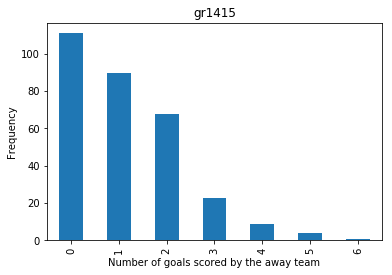

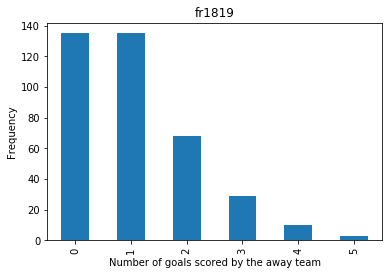

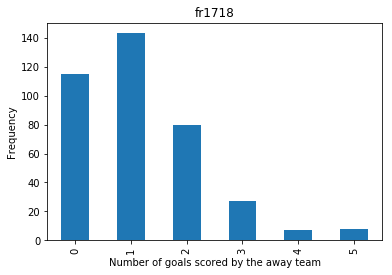

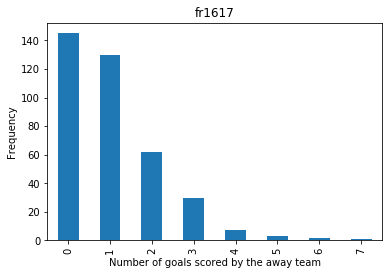

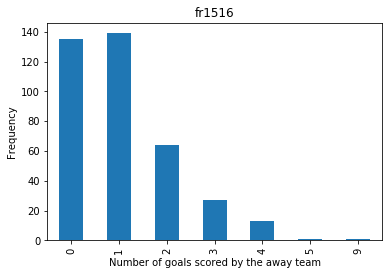

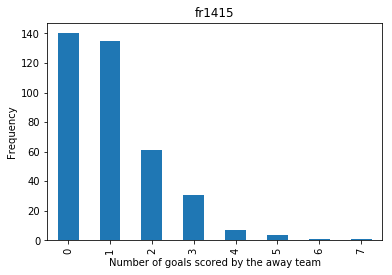

In [244]:
# away team goals
for i, j in data.items():
    fig, ax = plt.subplots()
    j['FTAG'].value_counts().sort_index().plot(ax=ax, kind='bar', title=i)
    plt.xlabel('Number of goals scored by the away team')
    plt.ylabel('Frequency');

Analysing data

en : 2.8210526315789473
es : 2.586842105263158
it : 2.681578947368421
gr : 3.179738562091503
fr : 2.557894736842105


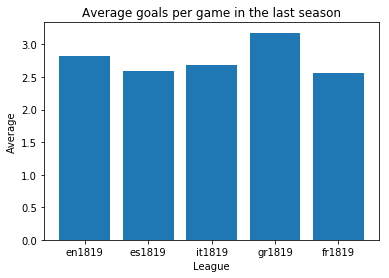

In [253]:
# average number of goals per game in the last season
average_goals = {}
for l in leagues:
    home_goals = data[l+'1819']['FTHG'].sum()
    away_goals = data[l+'1819']['FTAG'].sum()
    goals = home_goals + away_goals
    matches = len(data[l+'1819'])
    average_goals[l+'1819'] = goals/matches
    print(l, ':', average_goals[l+'1819'])
    
plt.bar(average_goals.keys(), average_goals.values())
plt.title('Average goals per game in the last season')
plt.xlabel('League')
plt.ylabel('Average');

# in Germany they scored the most goals on average last year

1900
en : 1.3968421052631579
es : 1.3773684210526316
it : 1.4189473684210527
gr : 1.5130718954248366
fr : 1.3194736842105264


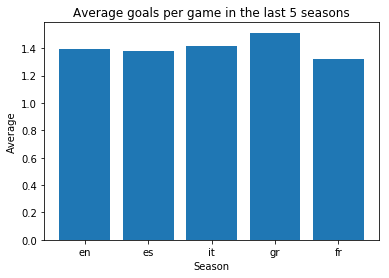

In [266]:
# average number of goals per game in the last five season together
data1['en'] = pd.concat([data['en1415'], data['en1516'], data['en1617'], data['en1718'], data['en1819']], sort=False, ignore_index=True)
data1['es'] = pd.concat([data['es1415'], data['es1516'], data['es1617'], data['es1718'], data['es1819']], sort=False, ignore_index=True)
data1['it'] = pd.concat([data['it1415'], data['it1516'], data['it1617'], data['it1718'], data['it1819']], sort=False, ignore_index=True)
data1['gr'] = pd.concat([data['gr1415'], data['gr1516'], data['gr1617'], data['gr1718'], data['gr1819']], sort=False, ignore_index=True)
data1['fr'] = pd.concat([data['fr1415'], data['fr1516'], data['fr1617'], data['fr1718'], data['fr1819']], sort=False, ignore_index=True)

print(len(data1['en']))

def compute_average_goals(league):
    home_goals = league['FTHG'].sum()
    home_goals = league['FTAG'].sum()
    goals = home_goals + away_goals
    matches = len(league)
    return goals/matches

average_goals_5 = {}
average_goals_5['en'] = compute_average_goals(data1['en'])
average_goals_5['es'] = compute_average_goals(data1['es'])
average_goals_5['it'] = compute_average_goals(data1['it'])
average_goals_5['gr'] = compute_average_goals(data1['gr'])
average_goals_5['fr'] = compute_average_goals(data1['fr'])

for i, j in average_goals_5.items():
    print(i, ':', j)
    
plt.bar(average_goals_5.keys(), average_goals_5.values())
plt.title('Average goals per game in the last 5 seasons')
plt.xlabel('Season')
plt.ylabel('Average');

# still in Germany, they score the most goals

Average en: 2.713157894736842
Average es: 2.7247368421052633
Average it: 2.716842105263158
Average gr: 2.884967320261438
Average fr: 2.634736842105263


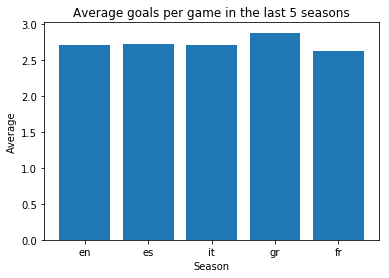

In [265]:
en =sum(average_goals_en)/len(average_goals_en)
es =sum(average_goals_es)/len(average_goals_es)
it =sum(average_goals_it)/len(average_goals_it)
gr =sum(average_goals_gr)/len(average_goals_gr)
fr =sum(average_goals_fr)/len(average_goals_fr)
print('Average en:', en)
print('Average es:', es)
print('Average it:', it)
print('Average gr:',gr)
print('Average fr:', fr)

plt.bar(['en', 'es', 'it', 'gr', 'fr'],[en, es, it, gr, fr])
plt.title('Average goals per game in the last 5 seasons')
plt.xlabel('Season')
plt.ylabel('Average');

en1819 : 2.8210526315789473
en1718 : 2.6789473684210527
en1617 : 2.8
en1516 : 2.7
en1415 : 2.5657894736842106
es1819 : 2.586842105263158
es1718 : 2.694736842105263
es1617 : 2.942105263157895
es1516 : 2.7447368421052634
es1415 : 2.655263157894737
it1819 : 2.681578947368421
it1718 : 2.6763157894736844
it1617 : 2.955263157894737
it1516 : 2.5763157894736843
it1415 : 2.694736842105263
gr1819 : 3.179738562091503
gr1718 : 2.7941176470588234
gr1617 : 2.866013071895425
gr1516 : 2.8300653594771243
gr1415 : 2.7549019607843137
fr1819 : 2.557894736842105
fr1718 : 2.718421052631579
fr1617 : 2.6157894736842104
fr1516 : 2.526315789473684
fr1415 : 2.4921052631578946
Average en: 2.713157894736842


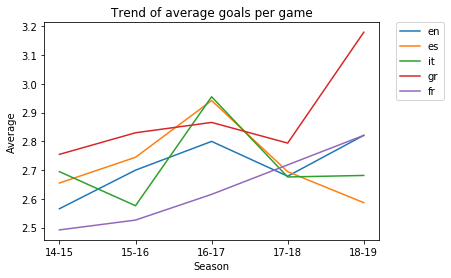

In [259]:
# trend of average number of goals per game in the last five season separately
average_goals = {}
for i, j in data.items():
    home_goals = j['FTHG'].sum()
    away_goals = j['FTAG'].sum()
    goals = home_goals + away_goals
    matches = len(j)
    average_goals[i] = goals/matches
    print(i, ':', average_goals[i])
    
average_goals_en = [average_goals['en1415'], average_goals['en1516'], average_goals['en1617'], average_goals['en1718'], average_goals['en1819']]
average_goals_es = [average_goals['es1415'], average_goals['es1516'], average_goals['es1617'], average_goals['es1718'], average_goals['es1819']]
average_goals_it = [average_goals['it1415'], average_goals['it1516'], average_goals['it1617'], average_goals['it1718'], average_goals['it1819']]
average_goals_gr = [average_goals['gr1415'], average_goals['gr1516'], average_goals['gr1617'], average_goals['gr1718'], average_goals['gr1819']]
average_goals_fr = [average_goals['fr1415'], average_goals['fr1516'], average_goals['fr1617'], average_goals['fr1718'], average_goals['en1819']]

seasons = ['14-15', '15-16', '16-17', '17-18','18-19']

plt.plot(seasons, average_goals_en)
plt.plot(average_goals_es)
plt.plot(average_goals_it)
plt.plot(average_goals_gr)
plt.plot(average_goals_fr)
plt.legend(['en', 'es', 'it', 'gr', 'fr'], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Trend of average goals per game')
plt.xlabel('Season')
plt.ylabel('Average');

print('Average en:', sum(average_goals_en)/len(average_goals_en))
print('Average en:', sum(average_goals_en)/len(average_goals_en))
print('Average en:', sum(average_goals_en)/len(average_goals_en))
print('Average en:', sum(average_goals_en)/len(average_goals_en))
print('Average en:', sum(average_goals_en)/len(average_goals_en))

In [269]:
# probability to see a game without any goal
def prob_games_without_goals(league):
    count = 0
    for i in league.index:
        if league.loc[i, 'FTHG'] == 0 & league.loc[i, 'FTAG'] == 0:
            count += 1
    return count/len(league)

In [270]:
for i, j in data.items():
    print(i, ':', prob_games_without_goals(j))

en1819 : 0.23157894736842105
en1718 : 0.23684210526315788
en1617 : 0.21842105263157896
en1516 : 0.24210526315789474
en1415 : 0.24210526315789474
es1819 : 0.21578947368421053
es1718 : 0.25
es1617 : 0.22894736842105262
es1516 : 0.2236842105263158
es1415 : 0.25526315789473686
it1819 : 0.23684210526315788
it1718 : 0.2657894736842105
it1617 : 0.2026315789473684
it1516 : 0.23421052631578948
it1415 : 0.22105263157894736
gr1819 : 0.20261437908496732
gr1718 : 0.19934640522875818
gr1617 : 0.1830065359477124
gr1516 : 0.24183006535947713
gr1415 : 0.23529411764705882
fr1819 : 0.23157894736842105
fr1718 : 0.24736842105263157
fr1617 : 0.23157894736842105
fr1516 : 0.25
fr1415 : 0.24736842105263157


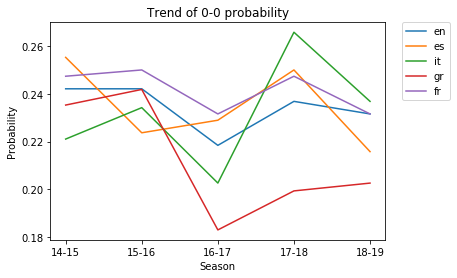

In [271]:
prob_en = [prob_games_without_goals(data['en1415']), prob_games_without_goals(data['en1516']), prob_games_without_goals(data['en1617']), prob_games_without_goals(data['en1718']), prob_games_without_goals(data['en1819'])]
prob_es = [prob_games_without_goals(data['es1415']), prob_games_without_goals(data['es1516']), prob_games_without_goals(data['es1617']), prob_games_without_goals(data['es1718']), prob_games_without_goals(data['es1819'])]
prob_it = [prob_games_without_goals(data['it1415']), prob_games_without_goals(data['it1516']), prob_games_without_goals(data['it1617']), prob_games_without_goals(data['it1718']), prob_games_without_goals(data['it1819'])]
prob_gr = [prob_games_without_goals(data['gr1415']), prob_games_without_goals(data['gr1516']), prob_games_without_goals(data['gr1617']), prob_games_without_goals(data['gr1718']), prob_games_without_goals(data['gr1819'])]
prob_fr = [prob_games_without_goals(data['fr1415']), prob_games_without_goals(data['fr1516']), prob_games_without_goals(data['fr1617']), prob_games_without_goals(data['fr1718']), prob_games_without_goals(data['fr1819'])]

plt.plot(seasons, prob_en)
plt.plot(prob_es)
plt.plot(prob_it)
plt.plot(prob_gr)
plt.plot(prob_fr)
plt.legend(['en', 'es', 'it', 'gr', 'fr'], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Trend of 0-0 probability')
plt.xlabel('Season')
plt.ylabel('Probability');

In [220]:
# average shoots on target in matches when no goal was scored
def average_shots(league):
    no_goal_games = 0
    total_shots = 0
    short_league = league[['FTHG', 'FTAG', 'HST', 'AST']].dropna()
    for i in short_league.index:   
        if short_league.loc[i, 'FTHG'] == 0 & short_league.loc[i, 'FTAG'] == 0:
            no_goal_games += 1
            shots = short_league.loc[i, 'HST'] + short_league.loc[i, 'AST']
            total_shots += shots
    return total_shots/no_goal_games  
        
for i, j in data.items():
    print(i, ':', average_shots(j))

en1819 : 7.443181818181818
en1718 : 6.722222222222222
en1617 : 7.433734939759036
en1516 : 7.086956521739131
en1415 : 6.923913043478261
es1819 : 7.109756097560975
es1718 : 7.4
es1617 : 7.517241379310345
es1516 : 7.129411764705883
es1415 : 7.154639175257732
it1819 : 9.033333333333333
it1718 : 7.623762376237623
it1617 : 7.857142857142857
it1516 : 6.808988764044944
it1415 : 7.023809523809524
gr1819 : 7.854838709677419
gr1718 : 7.327868852459017
gr1617 : 7.321428571428571
gr1516 : 7.621621621621622
gr1415 : 7.736111111111111
fr1819 : 6.806818181818182
fr1718 : 7.723404255319149
fr1617 : 7.022988505747127
fr1516 : 7.252631578947368
fr1415 : 6.627659574468085


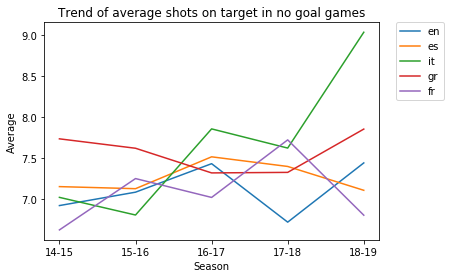

In [221]:
shots_en = [average_shots(data['en1415']), average_shots(data['en1516']), average_shots(data['en1617']), average_shots(data['en1718']), average_shots(data['en1819'])]
shots_es = [average_shots(data['es1415']), average_shots(data['es1516']), average_shots(data['es1617']), average_shots(data['es1718']), average_shots(data['es1819'])]
shots_it = [average_shots(data['it1415']), average_shots(data['it1516']), average_shots(data['it1617']), average_shots(data['it1718']), average_shots(data['it1819'])]
shots_gr = [average_shots(data['gr1415']), average_shots(data['gr1516']), average_shots(data['gr1617']), average_shots(data['gr1718']), average_shots(data['gr1819'])]
shots_fr = [average_shots(data['fr1415']), average_shots(data['fr1516']), average_shots(data['fr1617']), average_shots(data['fr1718']), average_shots(data['fr1819'])]

plt.plot(seasons, shots_en)
plt.plot(shots_es)
plt.plot(shots_it)
plt.plot(shots_gr)
plt.plot(shots_fr)
plt.legend(['en', 'es', 'it', 'gr', 'fr'], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Trend of average shots on target in no goal games')
plt.xlabel('Season')
plt.ylabel('Average');

en1819 : 0.6760350559081294
en1718 : 0.6806775407779172
en1617 : 0.6769884638737098
en1516 : 0.6827458256029685
en1415 : 0.6947401377582968
es1819 : 0.6929084661043423
es1718 : 0.6853103872157345
es1617 : 0.6699143785060526
es1516 : 0.6816239316239316
es1415 : 0.6827044025157233
it1819 : 0.7439698492462312
it1718 : 0.6937669376693767
it1617 : 0.6833944178178742
it1516 : 0.6905815423514539
it1415 : 0.6883749239196592
gr1819 : 0.6712837837837837
gr1718 : 0.6897677793904209
gr1617 : 0.6759053954175905
gr1516 : 0.7023031969749054
gr1415 : 0.7080013855213023
fr1819 : 0.6929879974731523
fr1718 : 0.6838077747168656
fr1617 : 0.6841937539834289
fr1516 : 0.6928982725527831
fr1415 : 0.6876649076517151


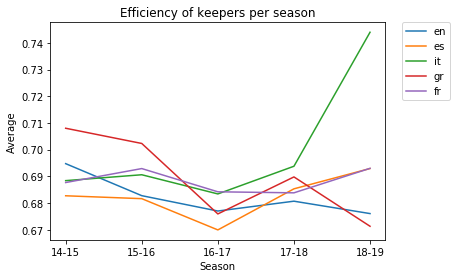

In [272]:
# goalkeepers efficieny
def efficiency_keepers(league):
    total_shots = 0
    total_goals = 0
    short_league = league[['FTHG', 'FTAG', 'HST', 'AST']].dropna()
    for i in short_league.index:   
        shots = short_league.loc[i, 'HST'] + short_league.loc[i, 'AST']
        total_shots += shots
        goals = short_league.loc[i, 'FTHG'] + short_league.loc[i, 'FTAG']
        total_goals += goals
    return 1-(total_goals/total_shots)
        
for i, j in data.items():
    print(i, ':', efficiency_keepers(j))



en1819 : 0.11159691859254632
en1718 : 0.10961559168730484
en1617 : 0.10981525441222004
en1516 : 0.10513372271749155
en1415 : 0.09902498476538696
es1819 : 0.10641983327920321
es1718 : 0.11229301458493256
es1617 : 0.12277619152207336
es1516 : 0.11550387596899225
es1415 : 0.11177578375983162
it1819 : 0.13133135713365124
it1718 : 0.10461886637177245
it1617 : 0.11155259759610608
it1516 : 0.09984701682814891
it1415 : 0.10228748376785536
gr1819 : 0.11842745861733203
gr1718 : 0.11090932676092878
gr1617 : 0.11512207928590182
gr1516 : 0.11040285568587456
gr1415 : 0.10587792012057272
fr1819 : 0.10368
fr1718 : 0.10954400848356309
fr1617 : 0.10879350093314305
fr1516 : 0.10968921389396709
fr1415 : 0.10922722029988466


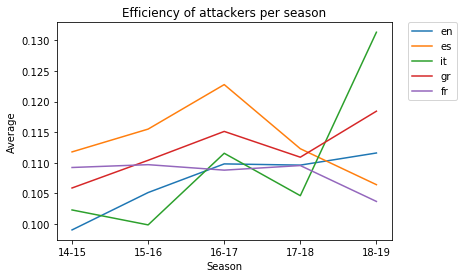

In [77]:
# strikers efficiency
def efficiency_attackers(league):
    total_shots = 0
    total_goals = 0
    short_league = league[['FTHG', 'FTAG', 'HS', 'AS']].dropna()
    for i in short_league.index:   
        shots = short_league.loc[i, 'HS'] + short_league.loc[i, 'AS']
        total_shots += shots
        goals = short_league.loc[i, 'FTHG'] + short_league.loc[i, 'FTAG']
        total_goals += goals
    return (total_goals/total_shots)

for i, j in data.items():
    print(i, ':', efficiency_attackers(j))
    
eff_str_en = [efficiency_attackers(data['en1415']), efficiency_attackers(data['en1516']), efficiency_attackers(data['en1617']), efficiency_attackers(data['en1718']), efficiency_attackers(data['en1819'])]
eff_str_es = [efficiency_attackers(data['es1415']), efficiency_attackers(data['es1516']), efficiency_attackers(data['es1617']), efficiency_attackers(data['es1718']), efficiency_attackers(data['es1819'])]
eff_str_it = [efficiency_attackers(data['it1415']), efficiency_attackers(data['it1516']), efficiency_attackers(data['it1617']), efficiency_attackers(data['it1718']), efficiency_attackers(data['it1819'])]
eff_str_gr = [efficiency_attackers(data['gr1415']), efficiency_attackers(data['gr1516']), efficiency_attackers(data['gr1617']), efficiency_attackers(data['gr1718']), efficiency_attackers(data['gr1819'])]
eff_str_fr = [efficiency_attackers(data['fr1415']), efficiency_attackers(data['fr1516']), efficiency_attackers(data['fr1617']), efficiency_attackers(data['fr1718']), efficiency_attackers(data['fr1819'])]

plt.plot(seasons, eff_str_en)
plt.plot(eff_str_es)
plt.plot(eff_str_it)
plt.plot(eff_str_gr)
plt.plot(eff_str_fr)
plt.legend(['en', 'es', 'it', 'gr', 'fr'], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Efficiency of attackers per season')
plt.xlabel('Season')
plt.ylabel('Average');

en1819 : 20.457894736842107
en1718 : 20.69736842105263
en1617 : 22.721052631578946
en1516 : 21.521052631578947
en1415 : 22.689473684210526
es1819 : 27.08157894736842
es1718 : 27.686842105263157
es1617 : 27.889473684210525
es1516 : 27.19736842105263
es1415 : 28.444736842105264
it1819 : 26.097368421052632
it1718 : 25.55263157894737
it1617 : 27.926315789473684
it1516 : 30.394736842105264
it1415 : 30.33157894736842
gr1819 : 22.375816993464053
gr1718 : 26.72222222222222
gr1617 : 28.61764705882353
gr1516 : 29.045751633986928
gr1415 : 30.535947712418302
fr1819 : 26.355263157894736
fr1718 : 26.144736842105264
fr1617 : 24.971052631578946
fr1516 : 26.71315789473684
fr1415 : 27.53157894736842


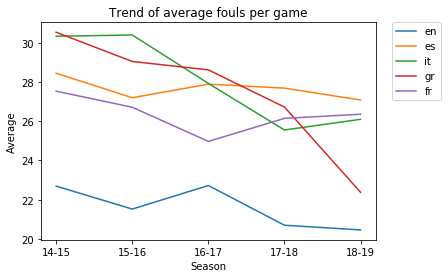

In [46]:
# average fouls per game
average_fouls = {}
for i, j in data.items():
    home_fouls = j['HF'].sum()
    away_fouls = j['AF'].sum()
    fouls = home_fouls + away_fouls
    matches = len(j)
    print(i, ':', fouls/matches)
    average_fouls[i] = fouls/matches
   
fouls_en = [average_fouls['en1415'], average_fouls['en1516'], average_fouls['en1617'], average_fouls['en1718'], average_fouls['en1819']]
fouls_es = [average_fouls['es1415'], average_fouls['es1516'], average_fouls['es1617'], average_fouls['es1718'], average_fouls['es1819']]
fouls_it = [average_fouls['it1415'], average_fouls['it1516'], average_fouls['it1617'], average_fouls['it1718'], average_fouls['it1819']]
fouls_gr = [average_fouls['gr1415'], average_fouls['gr1516'], average_fouls['gr1617'], average_fouls['gr1718'], average_fouls['gr1819']]
fouls_fr = [average_fouls['fr1415'], average_fouls['fr1516'], average_fouls['fr1617'], average_fouls['fr1718'], average_fouls['fr1819']]

plt.plot(seasons, fouls_en)
plt.plot(fouls_es)
plt.plot(fouls_it)
plt.plot(fouls_gr)
plt.plot(fouls_fr)
plt.legend(['en', 'es', 'it', 'gr', 'fr'], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Trend of average fouls per game')
plt.xlabel('Season')
plt.ylabel('Average');

In [ ]:
# average number of cards

In [ ]:
# use the date to count per beginning and end of season

**Betting analysis**

In [316]:
# when options available at multiple bet houses -> pick the largest odd
odds = {}
for i, j in data.items():
    odds[i] = j[['B365H', 'B365D', 'B365A', 'BWH', 'BWD','BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA','VCH', 'VCD', 'VCA']]

Betting on the largest odd of the underdog

In [320]:
display(odds['en1718'].head(1))
print(pick_largest_odd(odds['en1718'], 0))

,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA
0,1.53,4.5,6.5,1.5,4.6,6.75,1.47,4.5,6.5,1.53,4.55,6.85,1.53,4.2,6.0,1.53,4.5,6.5


PSA


In [318]:
def pick_largest_odd(league, game_number_odds):
    return(league.loc[game_number_odds].idxmax())

def get_largest_odd(league, game_number_odds):
    return(league.loc[game_number_odds].max())

import re
def check_result(league, game_number):
    pattern = r'[HDA]$'
    regex = re.compile(pattern, flags=re.IGNORECASE)
    text = pick_largest_odd(odds[league], game_number)
    return regex.findall(text)[0] == data[league].loc[game_number, 'FTR']

def compute_underdog_strategy(league):
    result = len(odds[league])
    for i in range(len(odds[league])):
        result -= 1
        if check_result(league, i):
            result += float(get_largest_odd(odds[league], i)) 
    return result-len(odds[league])

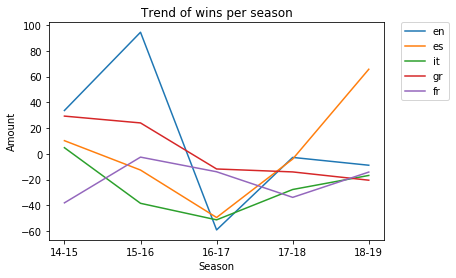

In [215]:
wins1 = {}
for i in data.keys():
    wins1[i] = compute_underdog_strategy(i)
    
bet1_en = [wins1['en1415'], wins1['en1516'], wins1['en1617'], wins1['en1718'], wins1['en1819']]
bet1_es = [wins1['es1415'], wins1['es1516'], wins1['es1617'], wins1['es1718'], wins1['es1819']]
bet1_it = [wins1['it1415'], wins1['it1516'], wins1['it1617'], wins1['it1718'], wins1['it1819']]
bet1_gr = [wins1['gr1415'], wins1['gr1516'], wins1['gr1617'], wins1['gr1718'], wins1['gr1819']]
bet1_fr = [wins1['fr1415'], wins1['fr1516'], wins1['fr1617'], wins1['fr1718'], wins1['fr1819']]

plt.plot(seasons, bet1_en)
plt.plot(bet1_es)
plt.plot(bet1_it)
plt.plot(bet1_gr)
plt.plot(bet1_fr)
plt.legend(['en', 'es', 'it', 'gr', 'fr'], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Trend of wins per season')
plt.xlabel('Season')
plt.ylabel('Amount');

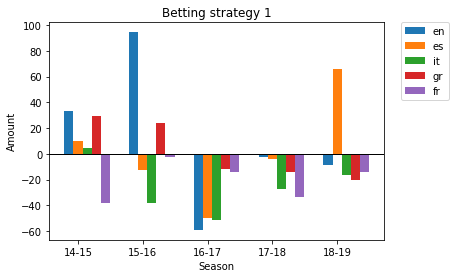

In [294]:
barWidth = 0.14

r1 = np.arange(len(bet1_en))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]


plt.bar(r1, bet1_en, width=barWidth, label='en')
plt.bar(r2, bet1_es, width=barWidth, label='es')
plt.bar(r3, bet1_it, width=barWidth, label='it')
plt.bar(r4, bet1_gr, width=barWidth, label='gr')
plt.bar(r5, bet1_fr, width=barWidth, label='fr')
plt.legend(['en', 'es', 'it', 'gr', 'fr'], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Season')
plt.ylabel('Amount')
plt.title('Betting strategy 1')
plt.xticks([r + barWidth for r in range(len(bet1_en))], seasons)
plt.axhline(linewidth=1, color='black');

Betting on the largest odd of the favorite

In [323]:
def pick_favorite(league, game_number):
    pattern = r'[HDA]$'
    regex = re.compile(pattern, flags=re.IGNORECASE)
    text = odds[league].loc[game_number].idxmin()
    print(text)
    return regex.findall(text)[0] 
    
def get_largest_favorite_odd(league, game_number, favorite):
    betting_houses = ['B365', 'BW', 'IW', 'PS', 'WH', 'VC']
    options = []
    for i in betting_houses:
        options.append(odds[league].loc[game_number, i+favorite])
    return(max(options))
        
def check_result(league, game_number, favorite):
    return favorite == data[league].loc[game_number, 'FTR']

def compute_favorite_strategy(league):
    result = len(odds[league])
    for i in range(len(odds[league])):
        result -= 1
        favorite = pick_favorite(league, i)
        if check_result(league, i, favorite):
            result += float(get_largest_favorite_odd(league, i, favorite))
    return result - len(odds[league])

In [325]:
print(pick_favorite('en1718', 0))
print(get_largest_favorite_odd('en1718', 0, 'H'))

IWH
H
1.53


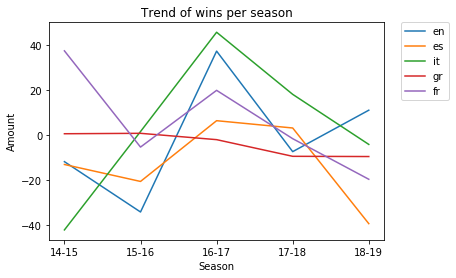

In [217]:
wins2 = {}
for i in data.keys():
    wins2[i] = compute_favorite_strategy(i)
    
bet2_en = [wins2['en1415'], wins2['en1516'], wins2['en1617'], wins2['en1718'], wins2['en1819']]
bet2_es = [wins2['es1415'], wins2['es1516'], wins2['es1617'], wins2['es1718'], wins2['es1819']]
bet2_it = [wins2['it1415'], wins2['it1516'], wins2['it1617'], wins2['it1718'], wins2['it1819']]
bet2_gr = [wins2['gr1415'], wins2['gr1516'], wins2['gr1617'], wins2['gr1718'], wins2['gr1819']]
bet2_fr = [wins2['fr1415'], wins2['fr1516'], wins2['fr1617'], wins2['fr1718'], wins2['fr1819']]

plt.plot(seasons, bet2_en)
plt.plot(bet2_es)
plt.plot(bet2_it)
plt.plot(bet2_gr)
plt.plot(bet2_fr)
plt.legend(['en', 'es', 'it', 'gr', 'fr'], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Trend of wins per season')
plt.xlabel('Season')
plt.ylabel('Amount');

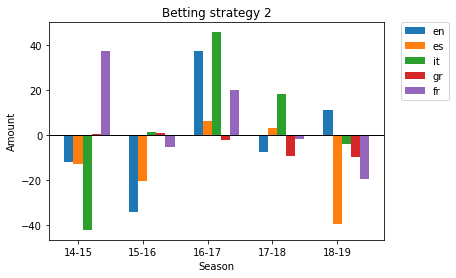

In [295]:
barWidth = 0.14

r1 = np.arange(len(bet2_en))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]


plt.bar(r1, bet2_en, width=barWidth, label='en')
plt.bar(r2, bet2_es, width=barWidth, label='es')
plt.bar(r3, bet2_it, width=barWidth, label='it')
plt.bar(r4, bet2_gr, width=barWidth, label='gr')
plt.bar(r5, bet2_fr, width=barWidth, label='fr')
plt.legend(['en', 'es', 'it', 'gr', 'fr'], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Season')
plt.ylabel('Amount')
plt.title('Betting strategy 2')
plt.xticks([r + barWidth for r in range(len(bet2_en))], seasons)
plt.axhline(linewidth=1, color='black');